In [1]:
import pandas as pd
import numpy as np
import sklearn
from collections import Counter
from itertools import dropwhile
from sklearn.cluster import KMeans
import matplotlib.pyplot

print("Import Complete")


Import Complete


In [2]:
def build_vocabulary(messages, word_drop=True):
        vocabulary = Counter()
        print(len(messages))
        for message in messages:
            message = str(message)
            #message = remove_nonalphanumeric(message)
            message_split = message.split()
            gram_count = 2
            grams = []
            for i in range(len(message_split) - 1):
                gram = ''
                for n in range(gram_count):
                    gram = gram + message_split[i+n] + ' '
                grams.append(gram[:-1])
            vocabulary = vocabulary + Counter(message_split) + Counter(grams)
        print(len(vocabulary))
        if word_drop == True:
            for key, count in dropwhile(
                                        lambda key_count: key_count[1] >= (len(messages) * .01),
                                        vocabulary.most_common()):
                del vocabulary[key]
        return vocabulary

def remove_nonalphanumeric(message):
    #try:        
    message = message.lower()
    delchar_table = {ord(c): None for c in message if c not in 'abcdefghijklmnopqrstuvwxyz0123456789 '}
    print(type(message))
    return message.translate(None, delchar_table)

def label_features(df, features_master):
        for i,row in df.iterrows():
            #message = pruning_dict.remove_nonalphanumeric(row.text)
            message = row.question_class
            features = Counter(message.split()) & features_master
            features = features + features_master
            features = list(np.array(list(features.values())) - 1)
            df.set_value(i,'features',features)
        return df
    
def create_feature_dataframe(df, features_master):
    return pd.DataFrame(list(df.features), columns=range(len(features_master)))


150
5219
1008


C:\Users\kerri\Anaconda2\envs\thinkhr\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\kerri\Anaconda2\envs\thinkhr\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  app.launch_new_instance()


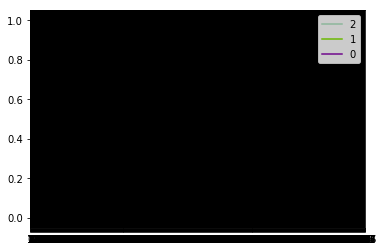

In [3]:
csvdata = "./data/subcategory_2_think_hr_v2.csv"
df = pd.read_csv(csvdata)
df = df[['question_class']][:150]
#print(df.question_class)
vocab = build_vocabulary(df.question_class)
print(len(vocab))
features_master = Counter(list(vocab.keys()))
df["features"] = [[0] * len(vocab)] * len(df)
df = label_features(df, features_master)
df2 = create_feature_dataframe(df, features_master)
clusterer = KMeans(n_clusters=3)
clusterer.fit(df2)

predict = clusterer.predict(df2)
df2['cluster'] = predict
pd.tools.plotting.parallel_coordinates(df2, 'cluster')

